In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from AutoUnet_half import *
from train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


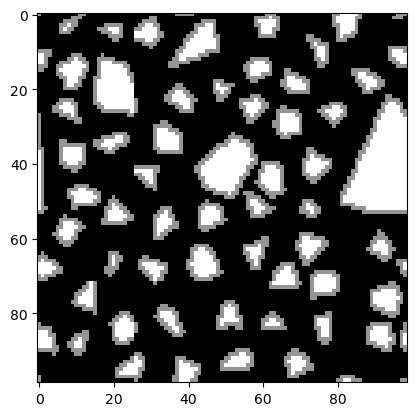

In [2]:
data = dataset()
imgs, label = data.__getitem__(3)
loaders = get_loaders_manual(data, 10)
plt.imshow(imgs[0], cmap='Greys')

In [3]:
args = {'lr' : 0.001, 'epochs' : 100, 'dev' : dev, 'name' : 'AutoUnet_half'}

In [4]:
unet = AutoUNet_half()

In [5]:
unet = load_network(unet, args['name']+'_4', args)

In [5]:
losses_train, losses_val = train(unet, loaders, args)

c:\Users\gaynuliy\Anaconda3\envs\home\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0 batch: 0 mean train loss:  6829.6179687500
Epoch: 0 batch: 200 mean train loss:  1658.3640625000
Epoch: 0 batch: 400 mean train loss:  1117.6068359375
Epoch: 0 batch: 600 mean train loss:  1105.6149414062
Epoch: 0 batch: 800 mean train loss:  1437.4136718750
Epoch: 0 batch: 1000 mean train loss:  1184.9833007812
Epoch: 0 batch: 1200 mean train loss:  1237.5382812500
Epoch: 0 batch: 1400 mean train loss:  1330.2598632813
Epoch: 0 batch: 1600 mean train loss:  1367.6832031250
Epoch: 0 batch: 1800 mean train loss:  1307.5558593750
Epoch: 0 batch: 2000 mean train loss:  1197.9926757812
Epoch: 0 batch: 2200 mean train loss:  944.5928710937
Epoch: 0 batch: 2400 mean train loss:  1101.2048828125
Epoch: 0 batch: 2600 mean train loss:  1505.2235351562
Epoch: 0 batch: 2800 mean train loss:  1373.5865234375
Epoch: 0 batch: 3000 mean train loss:  1398.8746093750
Epoch: 0 batch: 3200 mean train loss:  1000.5204101563
Epoch: 0 batch: 3400 mean train loss:  1270.0887695312
Epoch: 0 batch: 36

KeyboardInterrupt: 

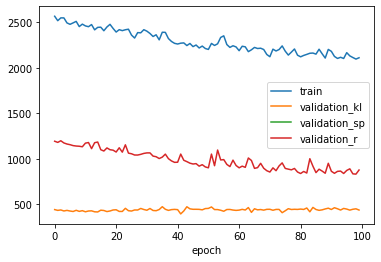

In [28]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
unet = unet.to(args['dev'])

In [9]:
y = unet(train_data)